# Import the Required Libraries

In [3]:
import numpy as np
import pandas as pd
import pydotplus
#from google.colab import drive
from IPython.display import Image
from pylab import rcParams
from sklearn import metrics, preprocessing, tree
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from io import StringIO
import warnings

In [4]:
%matplotlib inline
rcParams['figure.figsize'] = 6, 6
warnings.filterwarnings("ignore")

In [5]:
def plot_decision_tree(clf, feature_name, target_name):
    dot_data = StringIO()
    tree.export_graphviz(clf, out_file=dot_data,
                        feature_names=feature_name,
                        class_names=target_name,
                        filled=True, rounded=True,
                        special_characters=True)
    graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

# Load the dataset

In [6]:
df = pd.read_csv('D:/MSc-in-ML-&-Ai/Machine Learning 1/Model Selection/decision_tree_grid_search-master/loan_prediction.csv')
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,0.0,360.0,1.0,1
1,4583,1508.0,128.0,360.0,1.0,0
2,3000,0.0,66.0,360.0,1.0,1
3,2583,2358.0,120.0,360.0,1.0,1
4,6000,0.0,141.0,360.0,1.0,1


In [7]:
df.shape

(614, 6)

# Import the DecisionTree Model

In [8]:
from sklearn.tree import DecisionTreeClassifier as dt
clf = dt()

In [9]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Split the Dataset into Train & Test

In [10]:
X = df.iloc[:,0:len(df.columns)-1].values
y = df.iloc[:, -1].values

In [11]:
X.shape

(614, 5)

In [12]:
y.shape

(614,)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [15]:
X_train.shape

(460, 5)

In [16]:
y_test.shape

(154,)

# Check the cross validation score

In [17]:
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro')
scores.mean()

0.6335647802136856

# Model build

In [18]:
# Fit the model
clf.fit(X_train, y_train)

# Make predictions
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

In [19]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
train_cols = df.columns[0:len(df.columns)-1]

In [21]:
target_cols = df.columns[-1]

# Plot the DecisionTree

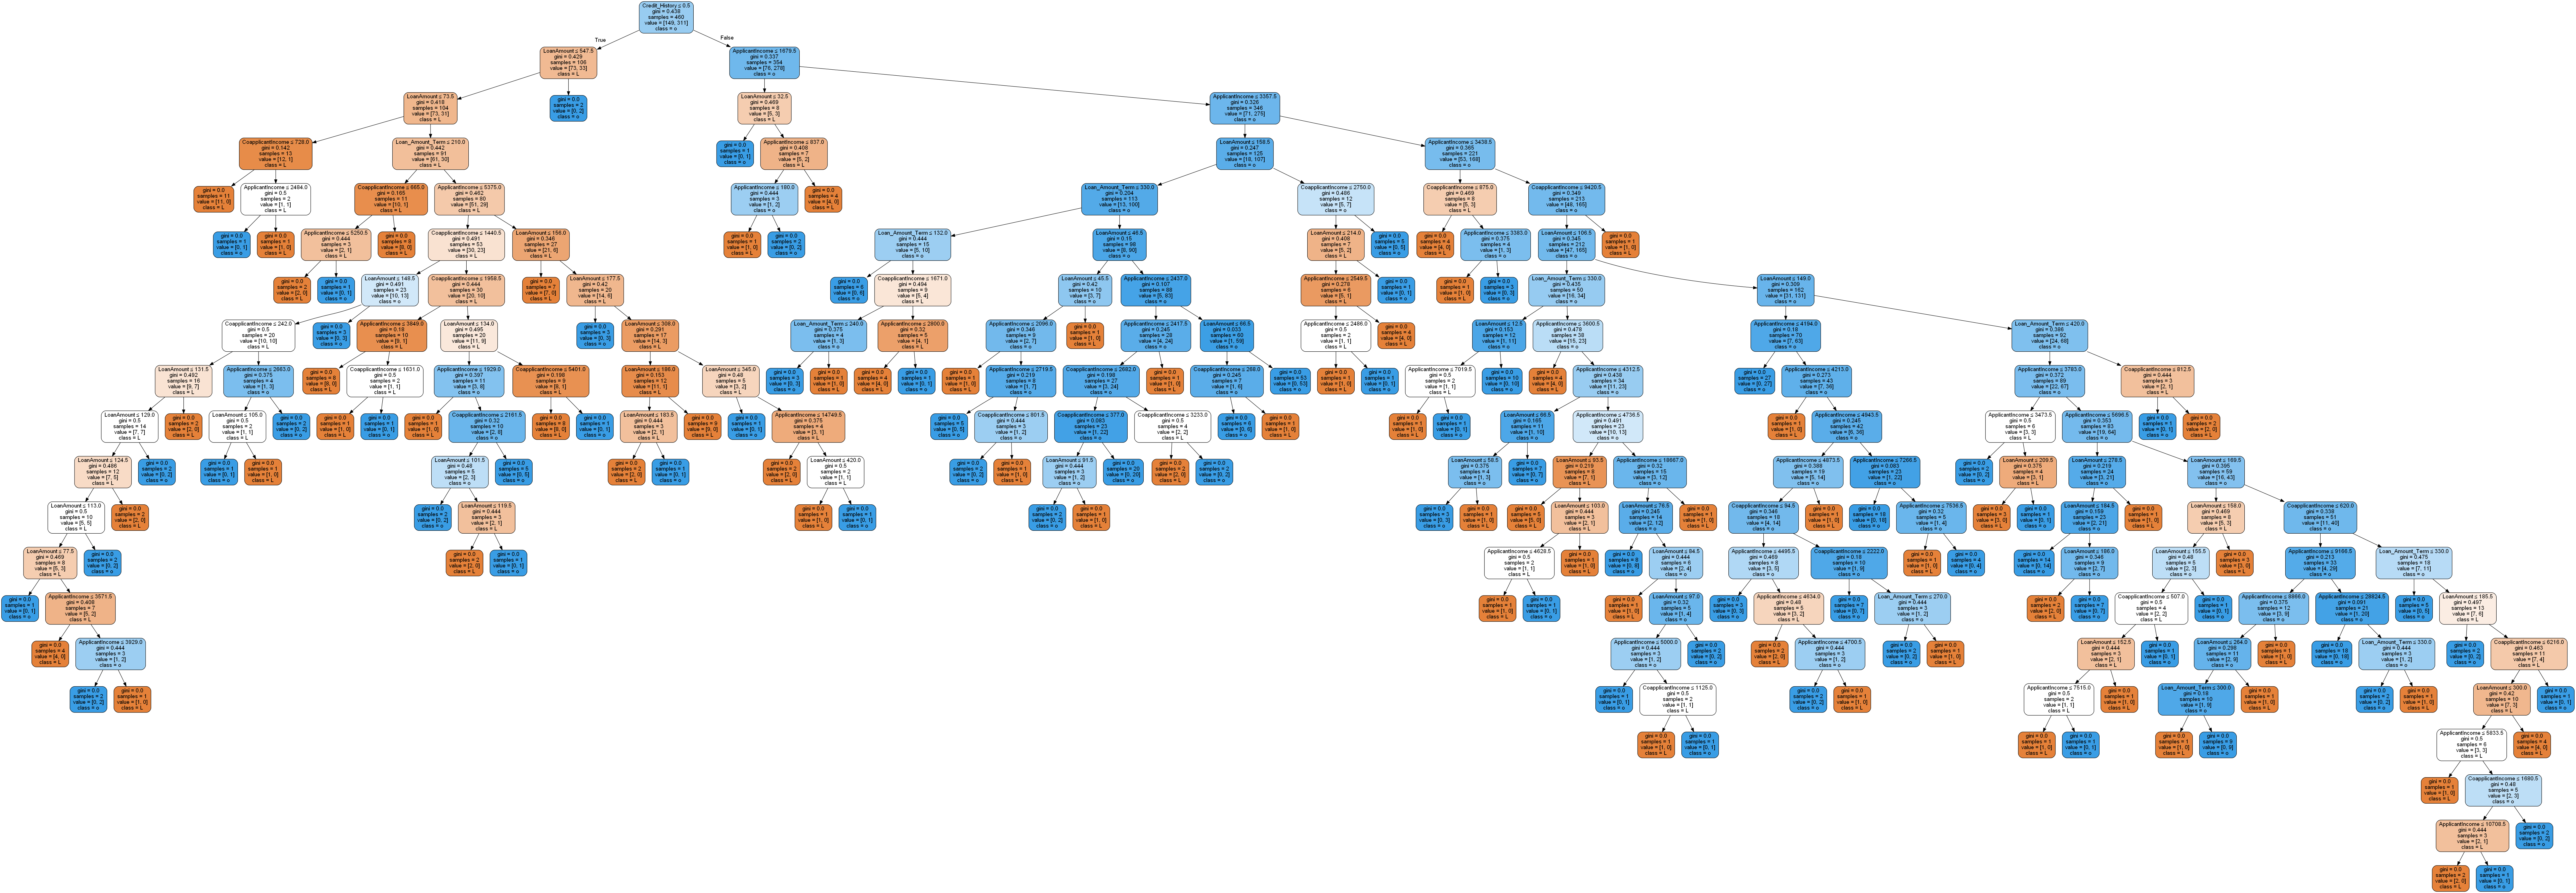

In [22]:
plot_decision_tree(clf, train_cols, target_cols)

In [23]:
print('The training F1 score is', f1_score(train_predictions, y_train))
print('The testing F1 score is', f1_score(test_predictions, y_test))

The training F1 score is 1.0
The testing F1 score is 0.751131221719457


In [27]:
parameters = {'max_depth': [1,2,3,4,5], 'min_samples_leaf':[1,2,3,4,5],
             'min_samples_split': [2,3,4,5], 'criterion':['gini', 'entropy']}
scorer = make_scorer(f1_score)
scorer

make_scorer(f1_score)

In [28]:
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)
grid_obj

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [29]:
grid_fit = grid_obj.fit(X_train, y_train)
grid_fit

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [30]:
best_clf = grid_fit.best_estimator_
best_clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

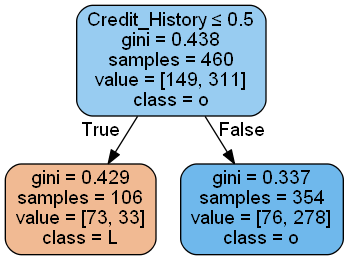

In [31]:
plot_decision_tree(best_clf, train_cols, target_cols)

In [33]:
scores = cross_val_score(best_clf, X_train, y_train, cv=5, scoring='f1_macro')
scores.mean()

0.7058924321624135

In [34]:
best_clf.fit(X_train, y_train)

# Make predictions using the new model
best_train_predictions = best_clf.predict(X_train)
best_test_predictions = best_clf.predict(X_test)

# Calculate the f1_score of the new model
print('The training F1 score is', f1_score(best_train_predictions, y_train))
print('The testing F1 score is', f1_score(best_test_predictions, y_test))

The training F1 score is 0.8360902255639098
The testing F1 score is 0.8620689655172413
